In [2]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt 

# Exploratory Data Analysis

In [3]:
train_labels = pd.read_csv('raw-data/train.csv')
train_labels.shape

(17500, 2)

In [4]:
# For each image in the training set it is specified if it contains a cactus or not.
train_labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
# There are no null values
print(train_labels.isna().sum())

id            0
has_cactus    0
dtype: int64


1    13136
0     4364
Name: has_cactus, dtype: int64


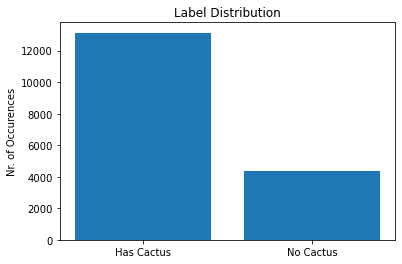

In [6]:
# Check label distribution
dist = train_labels.has_cactus.value_counts()
labels = ['Has Cactus', 'No Cactus']
plt.title('Label Distribution')
plt.ylabel('Nr. of Occurences')
plt.bar(labels, dist)
print(dist)

Most of the training data (~75%) has a cactus in the picture. This should not pose a problem for the models.

Feedback: uitleggen waarom de distributie logisch is.

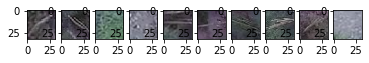

In [7]:
# See how the images look by loading 10 examples
base_path = 'data/test/images'
images = []
fig, axes = plt.subplots(1, 10)

for index, img_path in enumerate(os.listdir(base_path)[:10]):
    img = cv2.imread(f'{base_path}/{img_path}', cv2.COLOR_BGR2RGB)
    images.append(img)
    axes[index].imshow(img)

# The images are very small. This might pose a problem for the CNN.
# There also seems to be quite a difference between colors. It will be useful to determine wheter the pictures with cacti on it have the same color distribution as the ones without cacti.

In [8]:
def get_average_color_matrices(dir_path: list, colors=('r', 'g', 'b'), n_bins=256, hist_range=(0, 256)) -> list:
    """ Calculate average distribution of the given colors."""
    histograms = ([], [], [])
    avg_histograms = ([], [], [])

    # for each image
    for index, img_path in enumerate(os.listdir(dir_path)):
        img = cv2.imread(f'{dir_path}/{img_path}', cv2.COLOR_BGR2RGB)

        # Extract the values for each channel
        for channel_index, color in enumerate(colors):
            histogram, _ = np.histogram(img[:, :, channel_index], bins=n_bins, range=hist_range)
            histograms[channel_index].append(histogram)

    for i, _ in enumerate(colors):
        avg_hist = sum(histograms[i]) / len(histograms[i])
        avg_histograms[i].append(avg_hist)
    
    return avg_histograms

In [9]:
train_set_no_cactus = get_average_color_matrices('data/train/no_cactus')
train_set_has_cactus = get_average_color_matrices('data/train/has_cactus')
test_set = get_average_color_matrices('data/test/images')

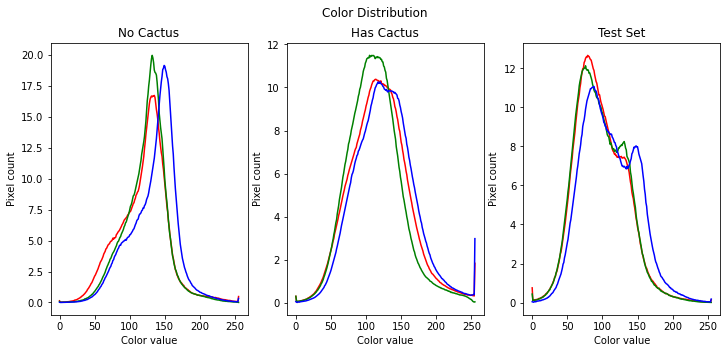

In [11]:
bin_edges = np.arange(0, 256)
colors=('r', 'g', 'b')

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Color Distribution')

for i, hist in enumerate(train_set_no_cactus):
    axes[0].plot(bin_edges, hist[0], color=colors[i])
    axes[0].set_ylabel('Pixel count')
    axes[0].set_xlabel('Color value')
    axes[0].set_title('Train Set: No Cactus')


for i, hist in enumerate(train_set_has_cactus):
    axes[1].plot(bin_edges, hist[0], color=colors[i])
    axes[1].set_ylabel('Pixel count')
    axes[1].set_xlabel('Color value')
    axes[1].set_title('Train Set: Has Cactus')

for i, hist in enumerate(test_set):
    axes[2].plot(bin_edges, hist[0], color=colors[i])
    axes[2].set_ylabel('Pixel count')
    axes[2].set_xlabel('Color value')
    axes[2].set_title('Test Set')

# Conclusion
The data appears to be very clean and uniform. The size of the pictures might cause some problems for the CNN, this can be fixed by resizing the images. Based on some discussion I read online it seems 32x32 pixels will be large enough for classification. If this proves to not be the case I can resize the images to 64x64.

The color distribution seems to be about even. It could be that in the tes

Loading the images takes up much of my RAM and takes a long time to load. I will need to find a generator function that fixes this. 